# Short Overview

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

# Numpy

In [2]:
a = np.array([10, 20, 30, 40, 50])
b = np.arange(10, 0, -2)
c = np.array(list('abcde'))

In [3]:
print(c)

['a' 'b' 'c' 'd' 'e']


In [4]:
a+b

array([20, 28, 36, 44, 52])

In [5]:
a+c

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [6]:
aint = np.array([10, 20, 30, 40, 50])
afloat = np.array([10, 20, 30, 40., 50])
astr = np.array(list('abcde'))

Some types can work together

In [7]:
afloat + aint

array([ 20.,  40.,  60.,  80., 100.])

Some can't

In [8]:
aint + astr

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

## dtype

In [9]:
print(aint.dtype)
print(astr.dtype)

int64
<U1


## Aggregate

In [12]:
print (np.array([1,4,98]).sum())
print (np.array([1,4,98]).mean())

103
34.333333333333336


## Shape
numpy array can have dimensions

In [14]:
a = np.arange(16).reshape(4,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


Methods on multi-dimensional arrays

In [17]:
print (a.T)

[[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]


## Slicing

In [19]:
print (a[::2, :2])

[[0 1]
 [8 9]]


## Broadcasting
two numpy arrays can be added if their dimensions are equal, or for one of them the dimension size is 1.

In [20]:
b = np.array([100,200,300,400])

In [21]:
print(a+b)

[[100 201 302 403]
 [104 205 306 407]
 [108 209 310 411]
 [112 213 314 415]]


Scalars can also be added, because it is an array with all dimensions of size 1.

In [22]:
a + 1000

array([[1000, 1001, 1002, 1003],
       [1004, 1005, 1006, 1007],
       [1008, 1009, 1010, 1011],
       [1012, 1013, 1014, 1015]])

# Pandas
Pandas has two first-class citizens - `DataFrame` and `Series`.
* `Series` is a container to an array, with an index and a name.
* `DataFrame` is a collection of `Series`.

## Series

In [23]:
s = pd.Series([1,1,1,50,32,1])
print(s)

0     1
1     1
2     1
3    50
4    32
5     1
dtype: int64


`Series` has many of what an `array` has and more

In [27]:
print (s.mean())
print (s+2)
print (s+s)

14.333333333333334
0     3
1     3
2     3
3    52
4    34
5     3
dtype: int64
0      2
1      2
2      2
3    100
4     64
5      2
dtype: int64


In [28]:
# Some other methods
s.value_counts()

1     4
50    1
32    1
dtype: int64

# DataFrame
Dataframe is a collections of series that work together.

In [39]:
df = pd.DataFrame({
    'name':['Dean','Inbal','Dean','Idan'],
    'income':[10,50,100,12],
     'date':pd.to_datetime(['2020-01-04','2020-01-15','2020-02-04','2020-01-24'])})

In [40]:
df

,name,income,date
0,Dean,10,2020-01-04
1,Inbal,50,2020-01-15
2,Dean,100,2020-02-04
3,Idan,12,2020-01-24


In [41]:
# It is still a series
df.income * 0.8

0     8.0
1    40.0
2    80.0
3     9.6
Name: income, dtype: float64

In [42]:
# We can easily assign new series to data frame
df['after_tax'] = df.income * 0.8

In [43]:
df

,name,income,date,after_tax
0,Dean,10,2020-01-04,8.0
1,Inbal,50,2020-01-15,40.0
2,Dean,100,2020-02-04,80.0
3,Idan,12,2020-01-24,9.6


## GroupBy

In [44]:
df.groupby('name').sum()

,income,after_tax
name,,
Dean,110,88.0
Idan,12,9.6
Inbal,50,40.0


## Easy Data Loading

In [45]:
df = pd.read_csv('../iris.csv')

In [46]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Plotting

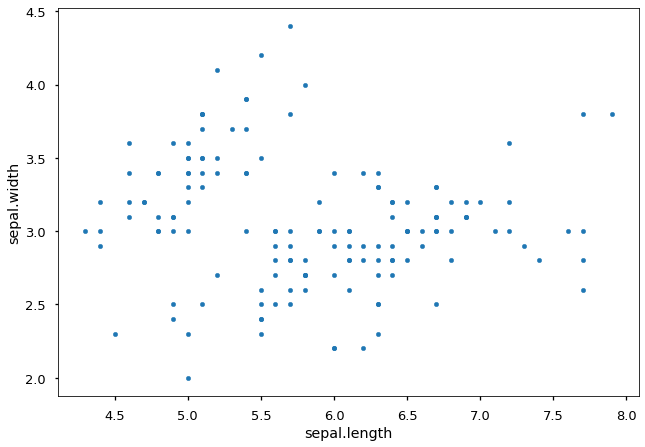

In [52]:
df.plot.scatter('sepal.length','sepal.width')